# Classification des partis politiques

Ce notebook a pour objectif de classifier des partis politiques en utilisant des modèles d'apprentissage automatique. Les étapes suivantes seront suivies :


1. **Chargement des Données** :
- Nous chargeons les données vectorisées à partir des fichiers CSV et les préparons pour l'entraînement et le test.

2. **Entraînement et Évaluation du Modèle** :
- Nous définissons une fonction `classification_data` qui permet d'entraîner et d'évaluer un modèle de classification.
( Nous utilisons cette fonction pour entraîner différents modèles et évaluer leurs performances.


### Récupération des valeurs des classes de nos données en train et test :

In [1]:
# Importation de la librairie nécessaire à la section :
import pandas as pd
from scipy.sparse import load_npz

In [2]:
# On charge les valeurs des classes de nos documents en train et en test : 
df_classes_train = pd.read_csv("./data_parlement/train/real_classes_data_train.csv")
df_classes_test = pd.read_csv("./data_parlement/test/real_classes_data_test.csv")

In [3]:
# On convertit ces deux tableaux en deux listes qui correpondent aux classes des documents : 
classes_train = df_classes_train["Classe"].tolist()
classes_test = df_classes_test["Classe"].tolist()

# On regarde si on a bien les mêmes résultats que dans le notebook vectorizer.ipynb :
print(f" 📚 Les classes du corpus test 📚 : \n {classes_test}")
print(f"📚 Les classes du corpus train 📚 : \n {classes_train}")

 📚 Les classes du corpus test 📚 : 
 ['ELDR', 'GUE-NGL', 'PPE-DE', 'GUE-NGL', 'PPE-DE', 'Verts-ALE', 'PPE-DE', 'PPE-DE', 'GUE-NGL', 'PPE-DE', 'Verts-ALE', 'Verts-ALE', 'PPE-DE', 'PPE-DE', 'GUE-NGL', 'PSE', 'PPE-DE', 'GUE-NGL', 'PSE', 'Verts-ALE', 'PPE-DE', 'PPE-DE', 'PPE-DE', 'PPE-DE', 'PPE-DE', 'PPE-DE', 'Verts-ALE', 'Verts-ALE', 'PSE', 'Verts-ALE', 'PPE-DE', 'ELDR', 'PPE-DE', 'PSE', 'Verts-ALE', 'PPE-DE', 'PPE-DE', 'PPE-DE', 'PSE', 'PPE-DE', 'Verts-ALE', 'PPE-DE', 'GUE-NGL', 'GUE-NGL', 'GUE-NGL', 'PPE-DE', 'PSE', 'PSE', 'PPE-DE', 'GUE-NGL', 'PSE', 'PPE-DE', 'ELDR', 'Verts-ALE', 'ELDR', 'PPE-DE', 'GUE-NGL', 'PSE', 'PSE', 'GUE-NGL', 'ELDR', 'PPE-DE', 'PSE', 'ELDR', 'Verts-ALE', 'PPE-DE', 'PPE-DE', 'PPE-DE', 'ELDR', 'PSE', 'PPE-DE', 'PSE', 'GUE-NGL', 'Verts-ALE', 'PSE', 'PSE', 'ELDR', 'PPE-DE', 'ELDR', 'ELDR', 'Verts-ALE', 'PPE-DE', 'Verts-ALE', 'PPE-DE', 'PSE', 'PSE', 'PPE-DE', 'PSE', 'PSE', 'Verts-ALE', 'GUE-NGL', 'Verts-ALE', 'PSE', 'ELDR', 'ELDR', 'ELDR', 'PPE-DE', 'ELDR', 'PPE-DE', 

### Récupération des valeurs de nos features correspondantes à chacun de nos documents en train et test : 

In [4]:
# On vient lire et récupérer les matrices enregistrées en sparse de nos données textuelles :

# On charge les matrices de nos données textuelles en train
datas_train = load_npz("./data_parlement/train/features_data_train.npz")

# On charge les matrices de nos données textuelles en test
datas_test = load_npz("./data_parlement/test/features_data_test.npz")

In [5]:
# on affiche les dimensions de nos matrices :
print(f"📚 Les dimensions de la matrice en train 📚 : {datas_train.shape}")
print(f"📚 Les dimensions de la matrice en test 📚 : {datas_test.shape}")

📚 Les dimensions de la matrice en train 📚 : (19370, 54760)
📚 Les dimensions de la matrice en test 📚 : (12915, 54760)


Tout semble correct, nous avons des matrices de la mêmes tailles que celles que nous avons créée avec la méthode tf-idf dans le notebook _vectorizer.ipynb_ .

Les classes sont aussi ordonnées de la même manière, rien ne semble avoir été perdu.

➮ Nous allons donc pouvoir commencer l'entrainement ! 

## Entraînement de nos modèles : 

In [6]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score

# On importe les libraires de visualisation
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
# On crée une fonction pour afficher les résultats de la classification
def classification_data(model, X_train, y_train, X_test, y_test, model_name):
    """
    Cette fonction permet d'entrainer et évaluer un modèle donné.
    
    Paramètres :
    - model: Le modèle d'apprentissage à entrainer.
    - X_train: Les données d'entraînement.
    - y_train: Les labels d'entraînement.
    - X_test: Les données de test.
    - y_test: Les labels de test.
    - model_name: Le nom de l'algorithme de classification.
    """
    
    print(" 🥁 Chargement ... 🥁")
    
    # Entraîne le modèle
    model.fit(X_train, y_train)
    
    # Prédire sur le jeu de test
    y_pred = model.predict(X_test)
    
    # Résultats de la classification
    print(f"🎄 Résultat : {model_name} 🎄")
    print(classification_report(y_test, y_pred))
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

    # Matrice de confusion
    print("🎨 Matrice de Confusion 🎨")
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10, 6))
    sns.heatmap(cm, fmt="d", annot=True, cmap="flare")
    plt.title("Matrice de Confusion")
    plt.xlabel("Prédiction")
    plt.ylabel("Réalité")
    plt.tight_layout()
    plt.show()

    return model_name, cm, y_pred

In [8]:
# Définition d'une fonction qui calcule la macro précision, le macro rappel et le f1-score pondérée :

def metrics_classification(y_test, y_pred):
    """
    Cette fonction permet de calculer la macro précision, le macro rappel et le f1-score pondérée.
    
    Paramètres :
    - y_test: Les labels de test.
    - y_pred: Les labels prédits.
    """
    
    # On calcule la macro précision
    macro_precision = round(precision_score(y_test, y_pred, average='macro'), 2)
    
    # On calcule le macro rappel
    macro_recall = round(recall_score(y_test, y_pred, average='macro'), 2)
    
    # On calcule le f1-score pondérée
    waighted_f1 = round(f1_score(y_test, y_pred, average='weighted'), 2)

    print(f"Macro Précision : {macro_precision}")
    print(f"Macro Rappel : {macro_recall}")
    print(f"F1-score pondérée : {waighted_f1}")
    
    return macro_precision, macro_recall, waighted_f1

## Test des algorithmes de classification

#### 1) **Arbre de décision**

In [9]:
from sklearn.tree import DecisionTreeClassifier

 🥁 Chargement ... 🥁
🎄 Résultat : Arbre de Décision 🎄
              precision    recall  f1-score   support

        ELDR       0.70      0.66      0.68      1339
     GUE-NGL       0.75      0.74      0.75      1793
      PPE-DE       0.77      0.78      0.77      4571
         PSE       0.72      0.73      0.73      3627
   Verts-ALE       0.68      0.67      0.68      1585

    accuracy                           0.74     12915
   macro avg       0.72      0.72      0.72     12915
weighted avg       0.74      0.74      0.74     12915

Accuracy: 0.7359659310878823
🎨 Matrice de Confusion 🎨


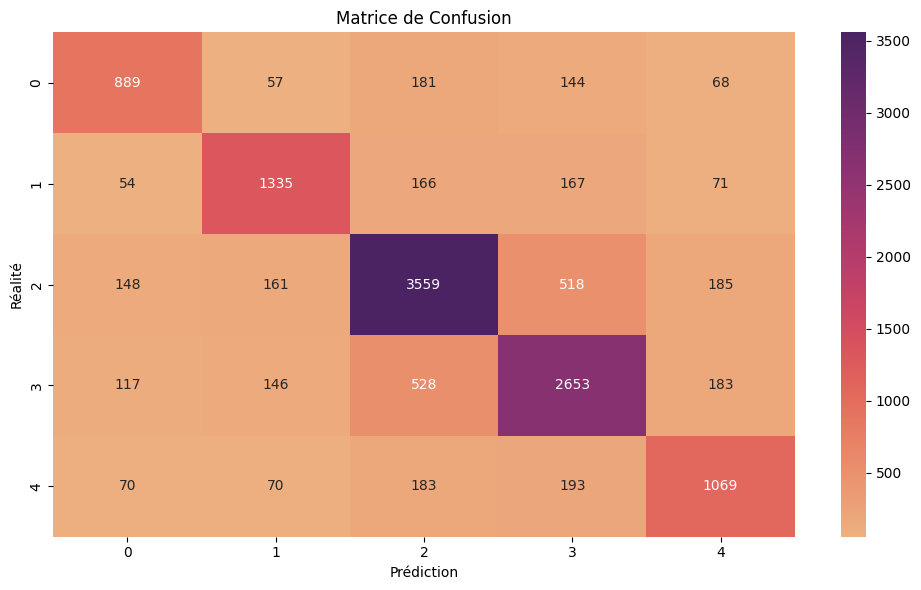

In [10]:
# Création du modèle --> 0.24 d'accuracy - 1 seconde
tree_model = DecisionTreeClassifier(random_state=42)

# On appelle notre fonction de classification
name_tree_model, cm_tree_model, pred_tree_model = classification_data(tree_model, datas_train, classes_train, datas_test, classes_test, "Arbre de Décision")

In [11]:
# Calcul des métriques :
macro_precision_tree_model, macro_recall_tree_model, waighted_f1_tree_model = metrics_classification(classes_test, pred_tree_model)

Macro Précision : 0.72
Macro Rappel : 0.72
F1-score pondérée : 0.74


#### 2) **Random Forest**

In [12]:
from sklearn.ensemble import RandomForestClassifier

 🥁 Chargement ... 🥁
🎄 Résultat : Random Forest 🎄
              precision    recall  f1-score   support

        ELDR       1.00      0.61      0.76      1339
     GUE-NGL       0.97      0.72      0.83      1793
      PPE-DE       0.64      0.96      0.77      4571
         PSE       0.84      0.67      0.75      3627
   Verts-ALE       1.00      0.61      0.76      1585

    accuracy                           0.77     12915
   macro avg       0.89      0.71      0.77     12915
weighted avg       0.82      0.77      0.77     12915

Accuracy: 0.7671699574138598
🎨 Matrice de Confusion 🎨


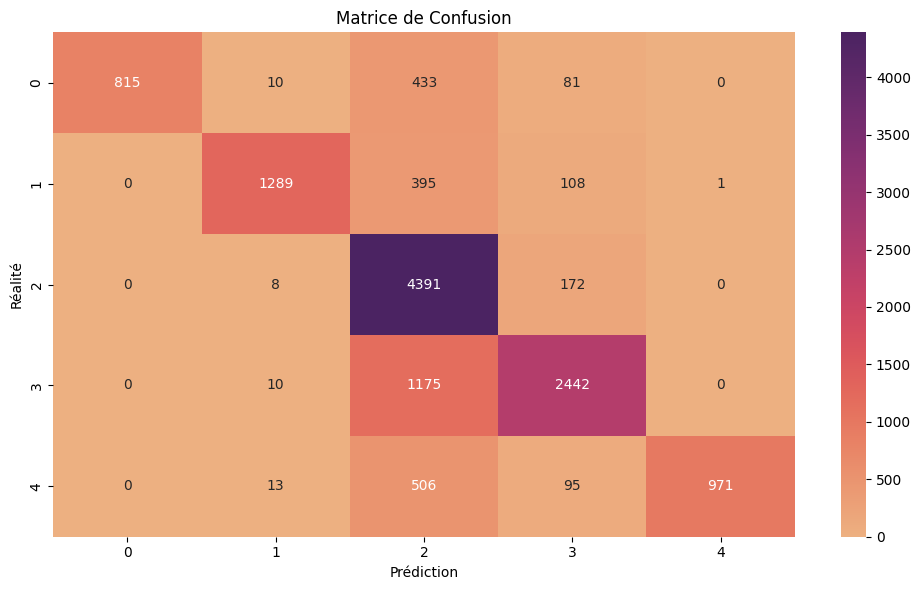

In [13]:
# Création du modèle --> 0.32 d'accuracy - 19 secondes

# Nous avons essayé avec l'hyperparamètre n_estimators=100 car il améliore généralement les performances du modèle, mais malheureusement pas ici
random_forest = RandomForestClassifier(random_state=42)

# On appelle notre fonction de classification
name_random_forest, cm_random_forest, pred_random_forest = classification_data(random_forest, datas_train, classes_train, datas_test, classes_test, "Random Forest")

In [14]:
# Calcul des métriques :
macro_precision_random_forest, macro_recall_random_forest, waighted_f1_random_forest = metrics_classification(classes_test, pred_random_forest)

Macro Précision : 0.89
Macro Rappel : 0.71
F1-score pondérée : 0.77


#### 3) **Naïve Bayes**

In [15]:
from sklearn.naive_bayes import MultinomialNB

 🥁 Chargement ... 🥁
🎄 Résultat : Naïve Bayes 🎄


/home/lise/Documents/TAL_M2S3/apprentissage_artificiel/.venv_apprentissage_auto/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/lise/Documents/TAL_M2S3/apprentissage_artificiel/.venv_apprentissage_auto/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/lise/Documents/TAL_M2S3/apprentissage_artificiel/.venv_apprentissage_auto/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in label

              precision    recall  f1-score   support

        ELDR       0.00      0.00      0.00      1339
     GUE-NGL       1.00      0.01      0.01      1793
      PPE-DE       0.36      1.00      0.53      4571
         PSE       0.78      0.04      0.07      3627
   Verts-ALE       0.00      0.00      0.00      1585

    accuracy                           0.36     12915
   macro avg       0.43      0.21      0.12     12915
weighted avg       0.48      0.36      0.21     12915

Accuracy: 0.36476964769647696
🎨 Matrice de Confusion 🎨


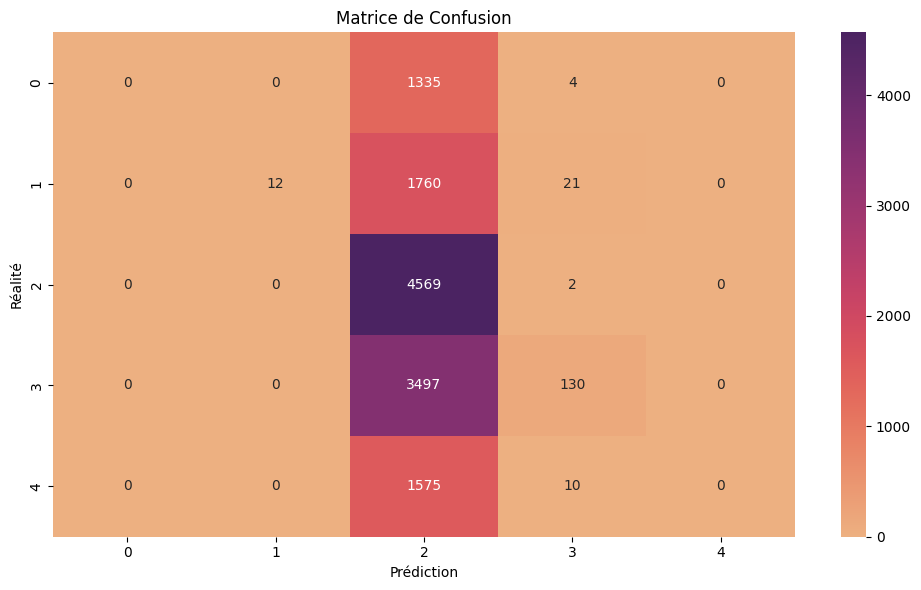

In [16]:
# Création du modèle --> 0.35 d'accuracy - 1 seconde

# En ajoutant des hyperparamètres (comme alpha), cela baissait
naive_bayes = MultinomialNB()

# On appelle notre fonction de classification
name_naive_bayes, cm_naive_bayes, pred_naive_bayes = classification_data(naive_bayes, datas_train, classes_train, datas_test, classes_test, "Naïve Bayes")

In [17]:
# Calcul des métriques :
macro_precision_naive_bayes, macro_recall_naive_bayes, waighted_f1_naive_bayes = metrics_classification(classes_test, pred_naive_bayes)

Macro Précision : 0.43
Macro Rappel : 0.21
F1-score pondérée : 0.21


/home/lise/Documents/TAL_M2S3/apprentissage_artificiel/.venv_apprentissage_auto/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#### 4) **Perceptron**

In [18]:
from sklearn.linear_model import Perceptron

 🥁 Chargement ... 🥁
🎄 Résultat : Perceptron 🎄
              precision    recall  f1-score   support

        ELDR       0.78      0.68      0.73      1339
     GUE-NGL       0.82      0.81      0.82      1793
      PPE-DE       0.79      0.83      0.81      4571
         PSE       0.75      0.77      0.76      3627
   Verts-ALE       0.77      0.71      0.74      1585

    accuracy                           0.78     12915
   macro avg       0.78      0.76      0.77     12915
weighted avg       0.78      0.78      0.78     12915

Accuracy: 0.7787843592721642
🎨 Matrice de Confusion 🎨


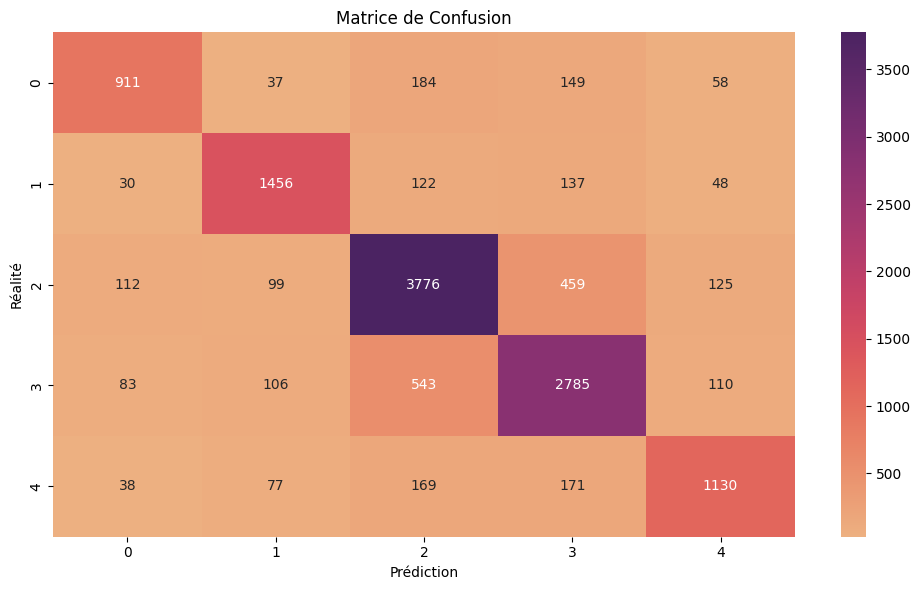

In [19]:
# Création du modèle --> 0.35 d'accuracy - 1 seconde

# L'augmentation de cet hyperparamètre améliore généralement les performances du modèle car il détermine le nombre maximal de passages sur les données d'entraînement (pour ajuster les poids du perceptron).
perceptron = Perceptron(max_iter=1000, random_state=42)

# On appelle notre fonction de classification
name_perceptron, cm_perceptron, pred_perceptron = classification_data(perceptron, datas_train, classes_train, datas_test, classes_test, "Perceptron")

In [20]:
# Calcul des métriques :
macro_precision_perceptron, macro_recall_perceptron, waighted_f1_perceptron = metrics_classification(classes_test, pred_perceptron)

Macro Précision : 0.78
Macro Rappel : 0.76
F1-score pondérée : 0.78


#### 5) **Support Vector Machine**

In [21]:
from sklearn.svm import SVC

In [ ]:
# Création du modèle --> 0.35 d'accuracy - 23 secondes 

# On fait une séparation linéaire pour le SVM afin que le modèle soit plus rapide
svm = SVC(kernel="linear", random_state=42)

# On appelle notre fonction de classification
name_svm, cm_svm, pred_svm = classification_data(svm, datas_train, classes_train, datas_test, classes_test, "Support Vector Machine")


 🥁 Chargement ... 🥁


In [ ]:
# Calcul des métriques :
macro_precision_svm, macro_recall_svm, waighted_f1_svm = metrics_classification(classes_test, pred_svm)

20 minutes !

7) **Linear SVC**

In [59]:
from sklearn.svm import LinearSVC

In [ ]:

# Création du modèle --> 0.35 d'accuracy - 1 secondes 

svc = LinearSVC()

name_svc, cm_svc, pred_svc = classification_data(svc, datas_train, classes_train, datas_test, classes_test, "Linear SVC")

In [ ]:
# Calcul des métriques :
macro_precision_svc, macro_recall_svc, waighted_f1_svc = metrics_classification(classes_test, pred_svc)

7) **Régression de logistique**

In [62]:
from sklearn.linear_model import LogisticRegression 

In [ ]:
# Création du modèle --> 0.35 d'accuracy - 1 seconde
log_reg = LogisticRegression()

# On appelle notre fonction de classification
name_log_reg, cm_log_reg, pred_log_reg = classification_data(log_reg, datas_train, classes_train, datas_test, classes_test, "Régression Logistique")

In [ ]:
# Calcul des métriques :
macro_precision_log_reg, macro_recall_log_reg, waighted_f1_log_reg = metrics_classification(classes_test, pred_log_reg)

8) **Complement NB**

In [65]:
from sklearn.naive_bayes import ComplementNB

In [ ]:
# Création du modèle --> 0.25 d'accuracy - 1 seconde

complemet_nb = ComplementNB()
name_complement_nb, cm_complement_nb, pred_complement_nb = classification_data(complemet_nb, datas_train, classes_train, datas_test, classes_test, "Complement Naive Bayes")

In [ ]:
# Calcul des métriques :
macro_precision_complement_nb, macro_recall_complement_nb, waighted_f1_complement_nb = metrics_classification(classes_test, pred_complement_nb)

## Croisement des résutlats de tous nos classifieurs : 

In [ ]:
# Affichage des résultats de tous les classifieurs : 
names = [name_tree_model, name_random_forest, name_naive_bayes, name_perceptron, name_svm, name_svc, name_log_reg, name_complement_nb]
macro_precisions = [macro_precision_tree_model, macro_precision_random_forest, macro_precision_naive_bayes, macro_precision_perceptron, macro_precision_svm, macro_precision_svc, macro_precision_log_reg, macro_precision_complement_nb]
macro_recalls = [macro_recall_tree_model, macro_recall_random_forest, macro_recall_naive_bayes, macro_recall_perceptron, macro_recall_svm, macro_recall_svc, macro_recall_log_reg, macro_recall_complement_nb]
f1_scores = [waighted_f1_tree_model, waighted_f1_random_forest, waighted_f1_naive_bayes, waighted_f1_perceptron, waighted_f1_svm, waighted_f1_svc, waighted_f1_log_reg, waighted_f1_complement_nb]

# On crée un DataFrame pour afficher les résultats
df_results = pd.DataFrame({
    "Modèle": names,
    "Macro Précision": macro_precisions,
    "Macro Rappel": macro_recalls,
    "F1-score pondérée": f1_scores
})

# trier les résultats par F1-score pondérée :
df_results = df_results.sort_values(by="F1-score pondérée", ascending=False)

df_results

In [80]:
# On sauvegarde les résultats dans un fichier csv

df_results.to_csv("./results/results_classifiers_real_classes.csv", index=False)

______________________________________________________________________________

Voici un tableau récapitulatif de tous les scores obtenus, qui permet de comparer les performances des différents algorithmes de classification utilisés dans ce projet. :

| Algorithmes              | Standard   | 
| :----------------------: |  :-------: |
| Arbre de décision        |    0,24    |
| Random Forest            |    0,32    |
| Naïve Bayes              |    0,35   |
| Perceptron               |    0,35   | 
| Support Vector Machine   |    0,35    | 
| Linear SVC              |    0,35    |
| Régression de logistique |    0,35   | 
| **Complement NB** |    0,25  |   

______________________________________________________________________________
